# **import libraries and load data**

In [ ]:
import pandas as pd
import numpy as np
from math import factorial
from collections import Counter
import io
from google.colab import files
import matplotlib.pyplot as plt
import math
import random
from scipy import stats

In [ ]:
# read the dataset into python
uploaded = files.upload()

Saving Oil_D.csv to Oil_D.csv


In [ ]:
df=pd.read_csv(io.BytesIO(uploaded['Oil_D.csv']))

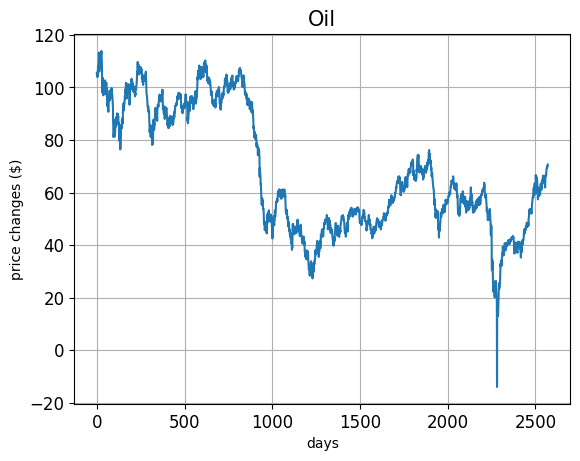

In [ ]:
plt.plot(df['Open'])
plt.xlabel('days')
plt.ylabel('price changes ($)')
plt.title('Oil', fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.grid()

In [ ]:
data=[]
for i in range(len(df['Open'])):
  data.append(df['Open'][i])

In [ ]:
relative_data=[]
for i in range(len(df['Open'])):
  relative_data.append((df['Open'][i]-df['Close'][i])/df['Open'][i])

In [ ]:
relative_data.remove(max(relative_data))

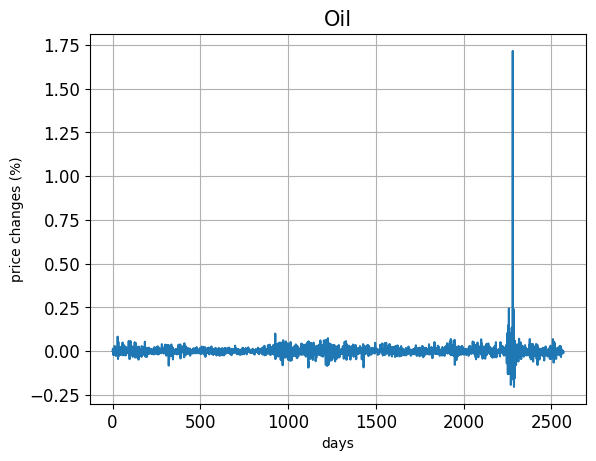

In [ ]:
plt.plot(relative_data)
plt.xlabel('days')
plt.ylabel('price changes (%)')
plt.title('Oil', fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.grid()

# **functions**

In [ ]:
# permutation entopy function
def permutation_entropy(time_series, order):
    N = len(time_series)
    permutations = np.empty((N - order + 1, order))

    # Step 2: Create Permutations
    for i in range(N - order + 1):
        permutations[i] = np.argsort(time_series[i:i+order])

    # Step 3: Count Occurrences
    counts = list(Counter([tuple(p) for p in permutations]).values())

    # Step 4: Calculate Probabilities
    probabilities = np.array(counts) / len(permutations)

    # Step 5: Calculate Permutation Entropy
    permutation_entropy = -np.sum(probabilities * np.log2(probabilities))

    return permutation_entropy

In [ ]:
def calculate_hurst_exponent(data):
    n = len(data)

    # Calculate the range (R) for different time window sizes (s).
    R = []
    S=[]
    cum_deviation=[]
    for s in range(1, n + 1):
      S.append(s)
      mean_s = np.mean(data[:s])
      cum_deviation.append(data[s-1] - mean_s)
    for i in range(1,len(cum_deviation)+1):
      R_s = np.max(cum_deviation[:i]) - np.min(cum_deviation[:i])
      R.append(R_s)

    # Calculate the standard deviation of the entire time series.
    std_data = np.std(data)

    # Calculate the R/S ratios.
    RS_ratio = np.divide(R, std_data)

    # Calculate the Hurst exponent as the slope of the log-log plot of RS_ratio vs. s.
    hurst_exponent = np.polyfit(np.log(S[1:]), np.log(RS_ratio[1:]), 1)[0]

    return hurst_exponent

In [ ]:
#change the time series to multi sub time series considering overlap
def multi_scale(time_series, num_scale):
  scale=[]
  scaled_series=[]
  for i in range(1,num_scale+1):
    L=[]
    for j in range(len(time_series)-i+1):
      L.append(sum(time_series[j:j+i])/i)
    scaled_series.append(L)
    scale.append(i)

  return scaled_series, scale

In [ ]:
def count_data_in_interval(time_series, start_interval, end_interval):
    # Convert the time series to a numpy array for easier manipulation
    time_series_array = np.array(time_series)

    # Create a boolean mask for data points within the interval
    mask = (time_series_array >= start_interval) & (time_series_array < end_interval)

    # Count the number of data points in the interval using the mask
    count_in_interval = np.sum(mask)

    return count_in_interval

In [ ]:
def shannon_entropy(time_series, bins):
  # Find the minimum and maximum values in the time series
  min_value = np.min(time_series)
  max_value = np.max(time_series)
  C=(max_value - min_value)/bins
  P=[]
  for i in range(bins):
    if(i==bins-1):
      n=count_data_in_interval(time_series, min_value+i*C , min_value+(i+1)*C)+1
      P.append(n/len(time_series))
    else:
      n=count_data_in_interval(time_series, min_value+i*C , min_value+(i+1)*C )
      P.append(n/len(time_series))
  P_values = [x for x in P if x != 0]
  entropy = -sum(p * np.log2(p) for p in P_values)
  return entropy

In [ ]:
#change the time series to multi sub time series
def multi_scale_permutation(time_series):
  scale=[]
  scaled_series=[]
  for i in range(1,int(len(time_series)/3)+1):
    scale.append(i)
    L1=[]
    L2=[]
    for j in range(int(len(time_series)/i)):
      L1.append(time_series[i*j:i*j+i])
    for k in range(len(L1)):
      L2.append(sum(L1[k])/len(L1[k]))
    scaled_series.append(L2)
  return scaled_series, scale

In [ ]:
#change the time series to multi sub time series
def multi_scale_shannon(time_series):
  scale=[]
  scaled_series=[]
  for i in range(1,int(len(time_series)/2)+1):
    scale.append(i)
    L1=[]
    L2=[]
    for j in range(int(len(time_series)/i)):
      L1.append(time_series[i*j:i*j+i])
    for k in range(len(L1)):
      L2.append(sum(L1[k])/len(L1[k]))
    scaled_series.append(L2)
  return scaled_series, scale

In [ ]:
#computing time series complexity using multi_scale function
def complexity_permutation(time_series):
  t,s=multi_scale_permutation(time_series)
  entropy=[]
  for i in range(len(t)):
    entropy.append(permutation_entropy(t[i],3))
  area = np.trapz(entropy, s)
  plt.plot(s, entropy)
  plt.fill_between(s, entropy, alpha=0.3)
  plt.xlabel('scale')
  plt.ylabel('entropy')
  plt.text(400,2.5, f'complexity  = {area }')
  plt.show()

In [ ]:
def complexity_permutation_value(time_series):
  t,s=multi_scale_permutation(time_series)
  entropy=[]
  for i in range(len(t)):
    entropy.append(permutation_entropy(t[i],3))
  area = np.trapz(entropy, s)
  return area

In [ ]:
#computing time series complexity using multi_scale function
def complexity_shannon(time_series):
  t,s=multi_scale_shannon(time_series)
  entropy=[]
  for i in range(len(t)):
    entropy.append(shannon_entropy(t[i]))
  area = np.trapz(entropy, s)
  plt.plot(s, entropy)
  plt.fill_between(s, entropy, alpha=0.3)
  plt.xlabel('scale')
  plt.ylabel('entropy')
  plt.text(600,3.75, f'complexity  = {area }')
  plt.show()

In [ ]:
def complexity_shannon_value(time_series):
  t,s=multi_scale_shannon(time_series)
  entropy=[]
  for i in range(len(t)):
    entropy.append(shannon_entropy(t[i]))
  area = np.trapz(entropy, s)
  return area

In [ ]:
def plot_time_series_histogram(data, bins, xlabel='Time', density=False, ylabel='Frequency', title='Time Series Histogram'):
    # Create the histogram
    hist, edges = np.histogram(data, bins=bins)

    # Get the bin centers
    bin_centers = 0.5 * (edges[1:] + edges[:-1])

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.bar(bin_centers, np.log(hist), width=(bin_centers[1] - bin_centers[0]), align='center')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid()
    plt.show()

In [ ]:
def compute_skewness(data):
    n = len(data)
    mean = np.mean(data)
    std_dev = np.std(data, ddof=1)
    skewness = (1 / n) * np.sum(((data - mean) / std_dev) ** 3)
    return skewness

In [ ]:
def compute_kurtosis(time_series):
    n = len(time_series)
    mean = np.mean(time_series)
    std_dev = np.std(time_series, ddof=1)
    kurtosis = (1 / n) * np.sum(((time_series - mean) / std_dev) ** 4) - 3
    return kurtosis

In [ ]:
def compute_std(time_series):
    if len(time_series) == 0:
        raise ValueError("Time series cannot be empty")

    mean = sum(time_series) / len(time_series)
    squared_diff_sum = sum((x - mean) ** 2 for x in time_series)

    variance = np.sqrt(squared_diff_sum / len(time_series))
    return variance

In [ ]:
def rescale_data(time_series):
  std=compute_std(time_series)
  scaled_data=[]
  mean=sum(time_series)/len(time_series)
  for i in range(len(time_series)):
    scaled_data.append((time_series[i]-mean)/std)
  return scaled_data

In [ ]:
import random

def generate_random_series(length):
    random_series = [random.random() for _ in range(length)]
    return random_series

In [ ]:
def pearson_corre(time_series, time_lag):
  series1=time_series[:len(time_series)-time_lag]
  series2=time_series[time_lag:]
  correlation, p_value = stats.pearsonr(series1,series2)
  return correlation

# **Auto Correlation computing**

mean = 0.0071871957055080465


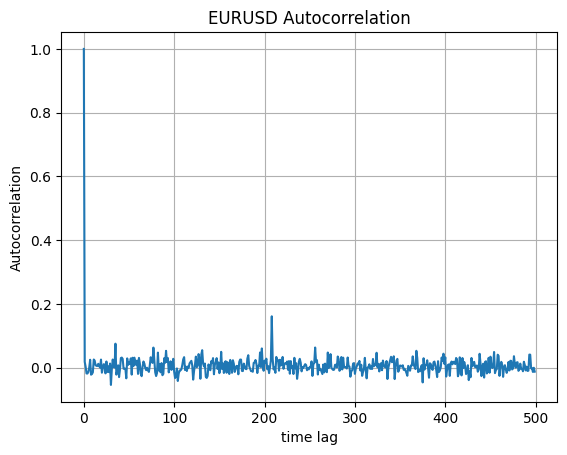

In [ ]:
#Auto correlation for total time series(%)
corr=[]
for i in range(500):
  corr.append(pearson_corre(dataset,i))
plt.plot(corr)
plt.xlabel('time lag')
plt.ylabel('Autocorrelation')
plt.title('EURUSD Autocorrelation')
plt.grid()
print(f"mean = {sum(corr) / len(corr)}")

mean = 0.163821896137428


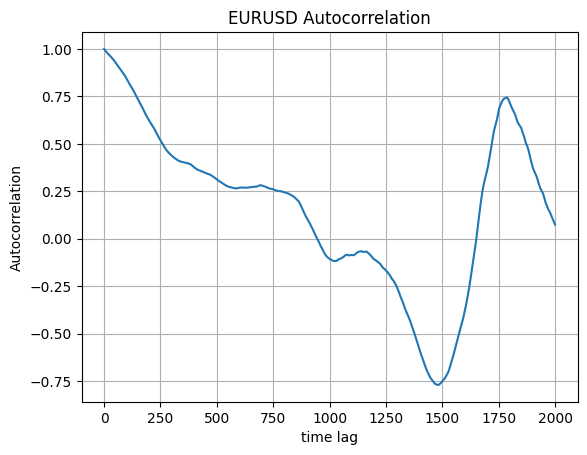

In [ ]:
#Auto correlation for total time series
corr=[]
for i in range(2000):
  corr.append(pearson_corre(data,i))

print(f"mean = {sum(corr) / len(corr)}")

plt.plot(corr)
plt.xlabel('time lag')
plt.ylabel('Autocorrelation')
plt.title('EURUSD Autocorrelation')
plt.grid()

# **Scatter plots**

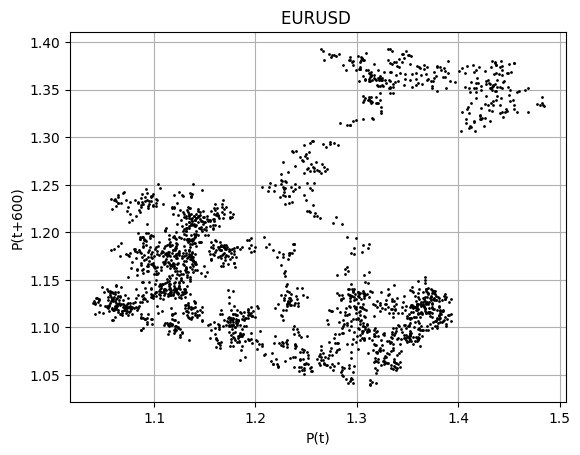

In [ ]:
#scatter plots time lag 600
W=data[:2063]
X=data[600:]
plt.plot(W,X,'ko', markersize=1)
plt.title('EURUSD ')
plt.xlabel('P(t)')
plt.ylabel('P(t+600)')
plt.grid()
plt.show()

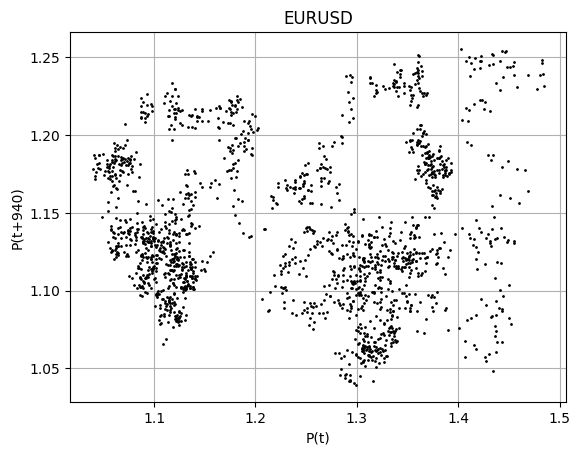

In [ ]:
#scatter plots time lag 940
W=data[0:1723]
X=data[940:]
plt.plot(W,X,'ko', markersize=1)
plt.title('EURUSD')
plt.xlabel('P(t)')
plt.ylabel('P(t+940)')
plt.grid()
plt.show()

Text(0.5, 1.0, 'EURUSD')

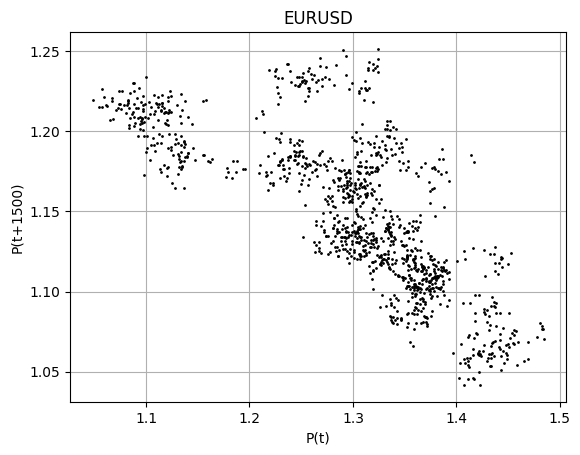

In [ ]:
#time lag 1500
W=data[:1163]
X=data[1500:]
plt.plot(W,X,'ko', markersize=1)
plt.xlabel('P(t)')
plt.ylabel('P(t+1500)')
plt.grid()
plt.title('EURUSD')

Text(0.5, 1.0, 'EURUSD')

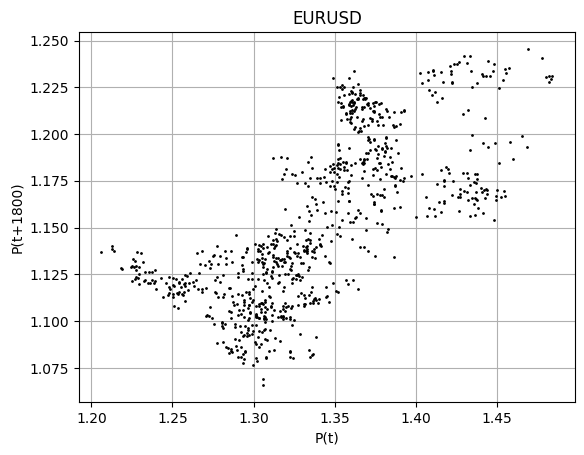

In [ ]:
#time lag 1800
W=data[:863]
X=data[1800:]
plt.plot(W,X,'ko', markersize=1)
plt.xlabel('P(t)')
plt.ylabel('P(t+1800)')
plt.grid()
plt.title('EURUSD')

# **multi scale entropy for original series**

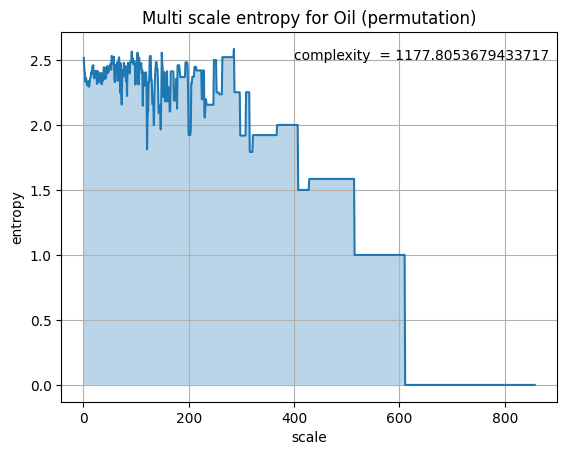

In [ ]:
plt.title('Multi scale entropy for Oil (permutation)')
plt.grid()
complexity_permutation(data)

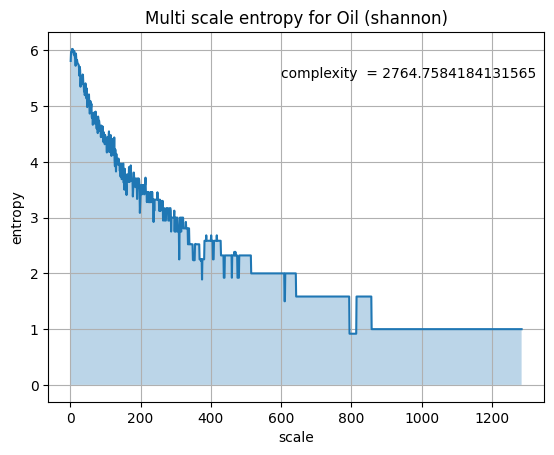

In [ ]:
plt.title('Multi scale entropy for Oil (shannon)')
plt.grid()
complexity_shannon(data)

# **multi scale entropy for relative channges series**

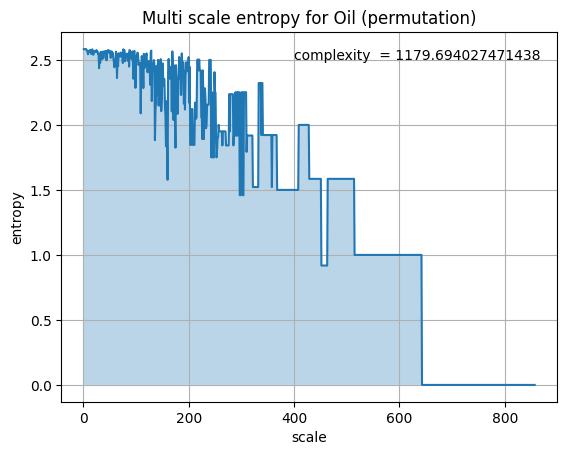

In [ ]:
plt.title('Multi scale entropy for Oil (permutation)')
plt.grid()
complexity_permutation(relative_data)

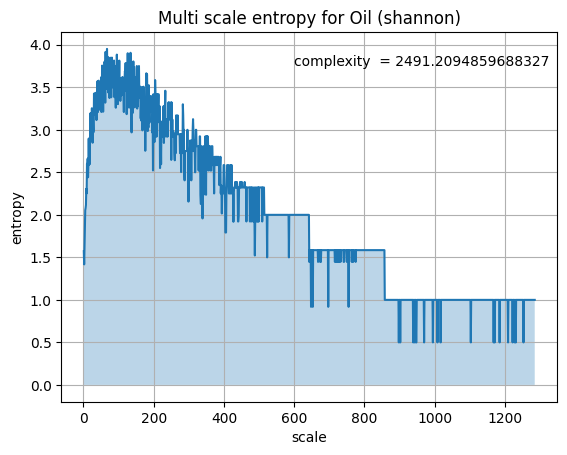

In [ ]:
plt.title('Multi scale entropy for Oil (shannon)')
plt.grid()
complexity_shannon(relative_data)

# **complexity per monthly periods for original time series**

In [ ]:
#computing complexity for monthly time frame
monthly_data=[]
monthly_relative_data=[]
for i in range(int(len(data)/30)):
  monthly_data.append(data[30*i:30*i+30])
  monthly_relative_data.append(relative_data[30*i:30*i+30])

In [ ]:
complexity_list_permutation=[]
complexity_list_shannon=[]
complexity_list_permutation_relative=[]
complexity_list_shannon_relative=[]
for i in range(len(monthly_data)):
  complexity_list_permutation.append(complexity_permutation_value(monthly_data[i]))
  complexity_list_shannon.append(complexity_shannon_value(monthly_data[i]))
  complexity_list_permutation_relative.append(complexity_permutation_value(monthly_relative_data[i]))
  complexity_list_shannon_relative.append(complexity_shannon_value(monthly_relative_data[i]))

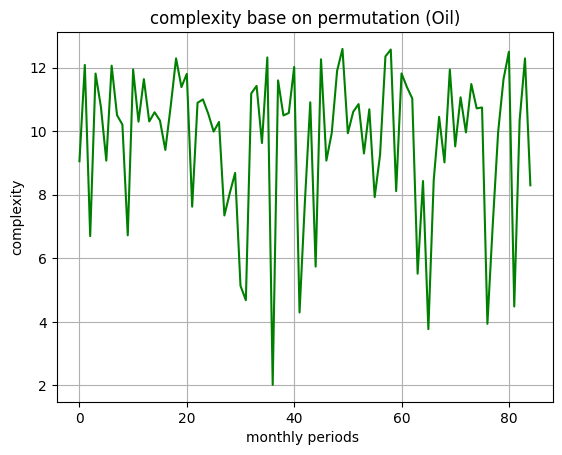

In [ ]:
#plottig monthly complexity changes
plt.plot(complexity_list_permutation, 'g')
plt.xlabel('monthly periods ')
plt.ylabel('complexity')
plt.title('complexity base on permutation (Oil)')
plt.grid()

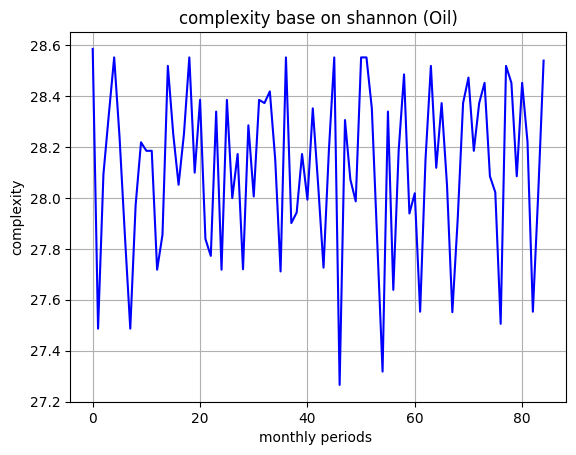

In [ ]:
#plottig monthly complexity changes
plt.plot(complexity_list_shannon, 'b')
plt.xlabel('monthly periods ')
plt.ylabel('complexity')
plt.title('complexity base on shannon (Oil)')
plt.grid()

# **complexity per monthly periods for relative channges time series**

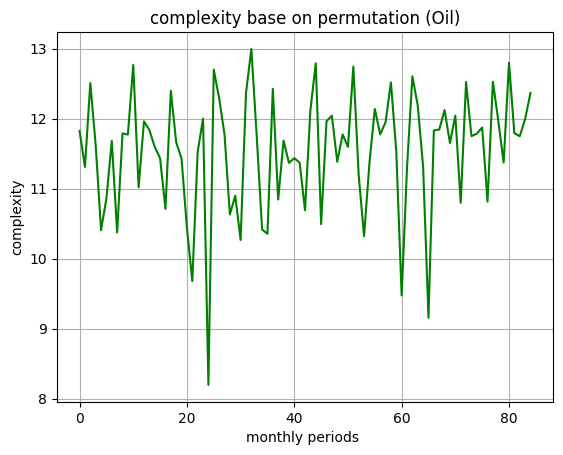

In [ ]:
#plottig monthly complexity changes
plt.plot(complexity_list_permutation_relative, 'g')
plt.xlabel('monthly periods ')
plt.ylabel('complexity')
plt.title('complexity base on permutation (Oil)')
plt.grid()

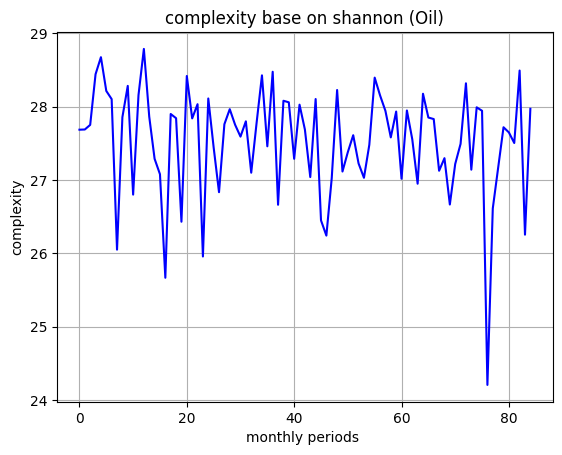

In [ ]:
#plottig monthly complexity changes
plt.plot(complexity_list_shannon_relative, 'b')
plt.xlabel('monthly periods ')
plt.ylabel('complexity')
plt.title('complexity base on shannon (Oil)')
plt.grid()

# **Price probability density distribution function**

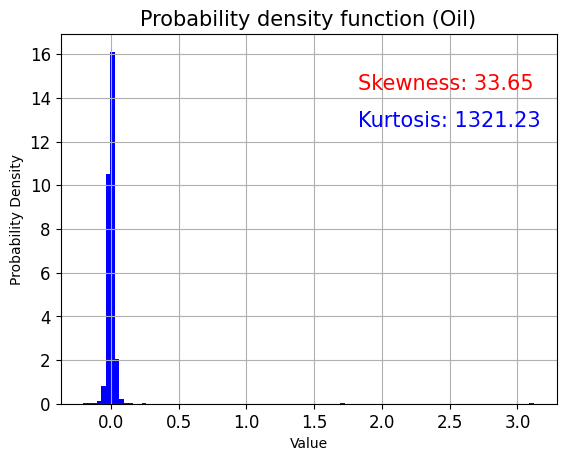

In [ ]:
skewness_value=compute_skewness(relative_data)
kurtosis_value=compute_kurtosis(relative_data)
#variance_value=compute_variance(relative_data)
# Create a histogram of the time series data
plt.hist(relative_data, bins=100, density=True, alpha=1, color='b')
plt.title("Probability density function (Oil)", fontsize=15)
plt.xlabel("Value")
plt.ylabel("Probability Density")
plt.grid()
plt.annotate(f'Skewness: {skewness_value:.2f}', xy=(0.6, 0.85), xycoords='axes fraction', fontsize=15, color='red')
plt.annotate(f'Kurtosis: {kurtosis_value:.2f}', xy=(0.6, 0.75), xycoords='axes fraction', fontsize=15, color='blue')
#plt.annotate(f'std: {variance_value:.3f}', xy=(0.75, 0.74), xycoords='axes fraction', fontsize=15, color='blue')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

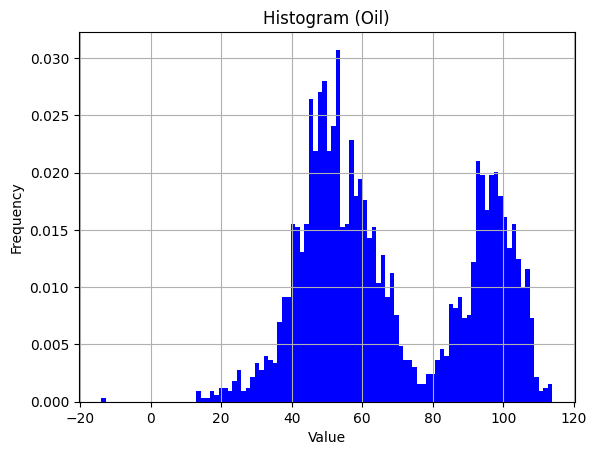

In [ ]:
# Create a histogram of the time series data
plt.hist(data, bins=100, density=True, alpha=1, color='b')
plt.title("Histogram (Oil)")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.grid()
plt.show()


# **multi scale kurtosis**

In [ ]:
multi_scale_data , scale=multi_scale_shannon(relative_data)

In [ ]:
kur=[]
for i in range(len(multi_scale_data)):
  kur.append(compute_kurtosis(multi_scale_data[i]))

In [ ]:
scale=scale[:200]
kur=kur[:200]

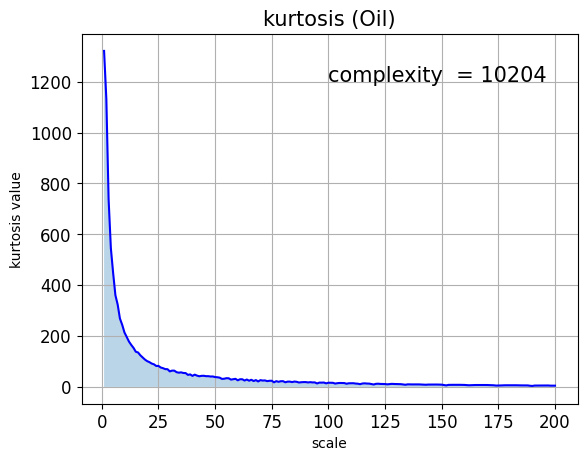

In [ ]:
area = np.trapz(kur, scale)
plt.plot(scale, kur, 'b')
plt.fill_between(scale, kur, alpha=0.3)
plt.title("kurtosis (Oil)", fontsize=15)
plt.xlabel("scale")
plt.ylabel("kurtosis value")
plt.text(100,1200, f'complexity  = {int(area)}', fontsize=15)
plt.grid()
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

# **multi scale skewness**

In [ ]:
skew=[]
for i in range(len(multi_scale_data)):
  skew.append(compute_skewness(multi_scale_data[i]))

In [ ]:
scale=scale[:200]
skew=skew[:200]

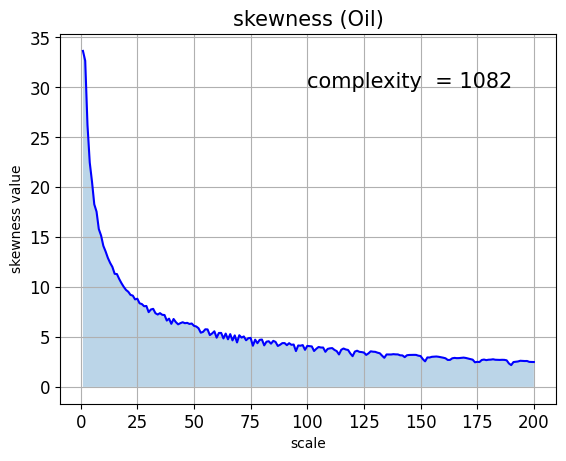

In [ ]:
area = np.trapz(skew, scale)
plt.plot(scale, skew, 'b')
plt.fill_between(scale, skew, alpha=0.3)
plt.title("skewness (Oil)", fontsize=15)
plt.xlabel("scale")
plt.ylabel("skewness value")
plt.text(100,30, f'complexity  = {int(area) }', fontsize=15)
plt.grid()
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

# **multi scale entropy**

In [ ]:
Data=rescale_data(data)

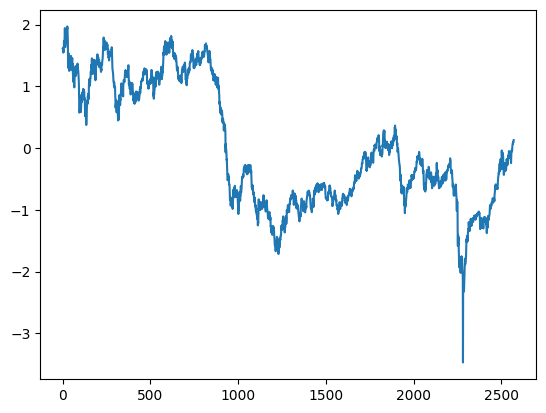

In [ ]:
plt.plot(Data)

In [ ]:
multi_scale_data , scale=multi_scale_permutation(data)

In [ ]:
ent=[]
for i in range(len(multi_scale_data)):
  ent.append(permutation_entropy(multi_scale_data[i],3))

In [ ]:
scale=scale[:500]
ent=ent[:500]

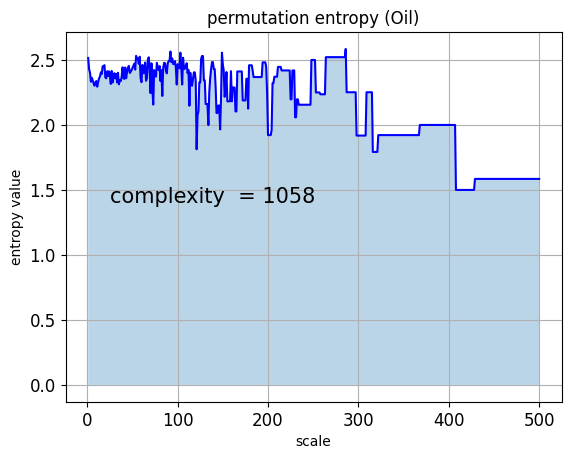

In [ ]:
area = np.trapz(ent, scale)
plt.plot(scale, ent, 'b')
plt.fill_between(scale, ent, alpha=0.3)
plt.title("permutation entropy (Oil)")
plt.xlabel("scale")
plt.ylabel("entropy value")
plt.text(25,1.4, f'complexity  = {1058 }', fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.grid()
plt.show()

In [ ]:
ent=[]
for i in range(len(multi_scale_data)):
  ent.append(shannon_entropy(multi_scale_data[i],1000))

In [ ]:
scale=scale[:500]
ent=ent[:500]

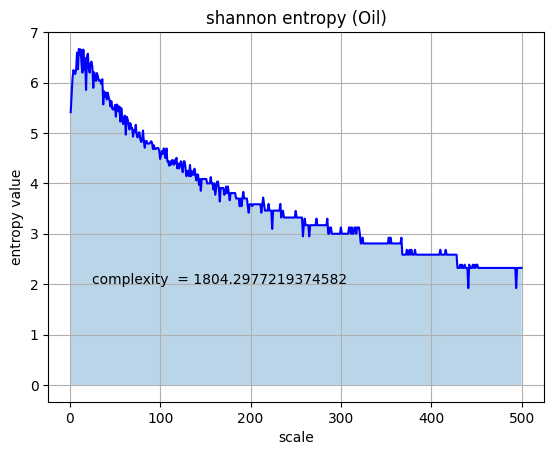

In [ ]:
area = np.trapz(ent, scale)
plt.plot(scale, ent, 'b')
plt.fill_between(scale, ent, alpha=0.3)
plt.title("shannon entropy (Oil)")
plt.xlabel("scale")
plt.ylabel("entropy value")
plt.text(25,2, f'complexity  = {area }')
plt.grid()
plt.show()

In [ ]:
def calculate_hurst_exponent(data):
    n = len(data)

    # Calculate the range (R) for different time window sizes (s).
    R = []
    for s in range(1, n + 1):
        mean_s = np.mean(data[:s])
        cum_deviation = np.cumsum(data[:s] - mean_s)
        R_s = np.max(cum_deviation) - np.min(cum_deviation)
        R.append(R_s)

    # Calculate the standard deviation of the entire time series.
    std_data = np.std(data)

    # Calculate the R/S ratios.
    RS_ratio = np.divide(R, std_data)

    # Calculate the Hurst exponent as the slope of the log-log plot of RS_ratio vs. s.
    hurst_exponent = np.polyfit(np.log(range(2, n + 1)), np.log(RS_ratio[1:]), 1)[0]
    return hurst_exponent

In [ ]:
calculate_hurst_exponent(data)

0.5142276856889217

In [ ]:
calculate_hurst_exponent(relative_data)

0.2634668246799977

# **generate random series**

In [ ]:
random_data=generate_random_series(5000)

In [ ]:
multi_scale_data , scale=multi_scale_shannon(random_data)

In [ ]:
calculate_hurst_exponent(random_data)

0.017057934408973584

In [ ]:
entropy=[]
for i in range(500):
  entropy.append(shannon_entropy(multi_scale_data[i],1000))

In [ ]:
scale=scale[:500]
entropy=entropy[:500]

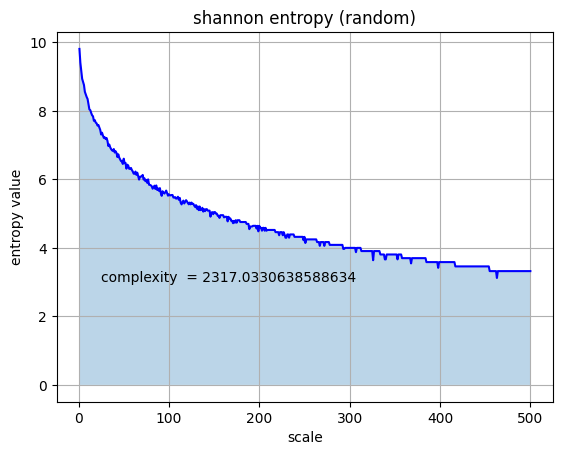

In [ ]:
area = np.trapz(entropy, scale)
plt.plot(scale, entropy, 'b')
plt.fill_between(scale, entropy, alpha=0.3)
plt.title("shannon entropy (random)")
plt.xlabel("scale")
plt.ylabel("entropy value")
plt.text(25,3, f'complexity  = {area }')
plt.grid()
plt.show()

In [ ]:
multi_scale_data , scale=multi_scale_permutation(random_data)

In [ ]:
entropy=[]
for i in range(500):
  entropy.append(permutation_entropy(multi_scale_data[i],3))

In [ ]:
scale=scale[:500]
entropy=entropy[:500]

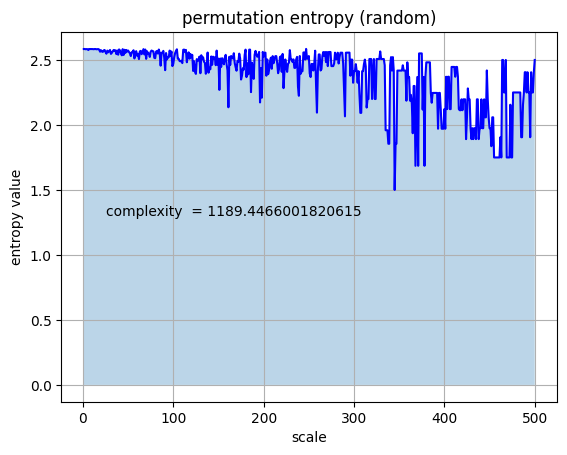

In [ ]:
area = np.trapz(entropy, scale)
plt.plot(scale, entropy, 'b')
plt.fill_between(scale, entropy, alpha=0.3)
plt.title("permutation entropy (random)")
plt.xlabel("scale")
plt.ylabel("entropy value")
plt.text(25,1.3, f'complexity  = {area }')
plt.grid()
plt.show()

In [ ]:
random_data=generate_random_series(5000)

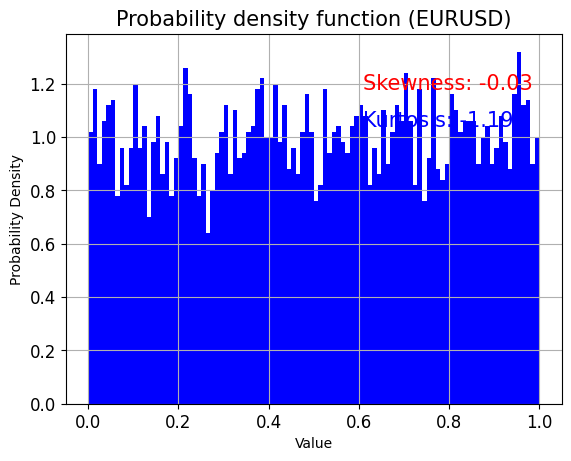

In [ ]:
skewness_value=compute_skewness(random_data)
kurtosis_value=compute_kurtosis(random_data)
#variance_value=compute_variance(relative_data)
# Create a histogram of the time series data
plt.hist(random_data, bins=100, density=True, alpha=1, color='b')
plt.title("Probability density function (EURUSD)", fontsize=15)
plt.xlabel("Value")
plt.ylabel("Probability Density")
plt.grid()
plt.annotate(f'Skewness: {skewness_value:.2f}', xy=(0.6, 0.85), xycoords='axes fraction', fontsize=15, color='red')
plt.annotate(f'Kurtosis: {kurtosis_value:.2f}', xy=(0.6, 0.75), xycoords='axes fraction', fontsize=15, color='blue')
#plt.annotate(f'std: {variance_value:.3f}', xy=(0.75, 0.74), xycoords='axes fraction', fontsize=15, color='blue')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

In [ ]:
multi_scale_data , scale=multi_scale_shannon(random_data)

In [ ]:
kur=[]
for i in range(len(multi_scale_data)):
  kur.append(compute_kurtosis(multi_scale_data[i]))

In [ ]:
skew=[]
for i in range(len(multi_scale_data)):
  skew.append(compute_skewness(multi_scale_data[i]))

In [ ]:
scale=scale[:200]
kur=kur[:200]
skew=skew[:200]

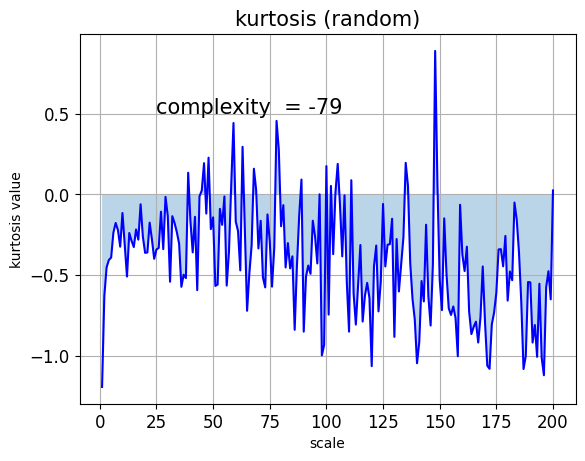

In [ ]:
area = np.trapz(kur, scale)
plt.plot(scale, kur, 'b')
plt.fill_between(scale, kur, alpha=0.3)
plt.title("kurtosis (random)",fontsize=15)
plt.xlabel("scale")
plt.ylabel("kurtosis value")
plt.text(25,0.5, f'complexity  = {int(area)}', fontsize=15)
plt.grid()
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

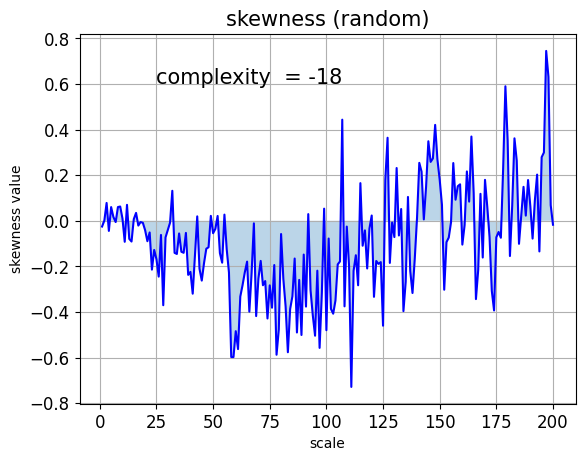

In [ ]:
area = np.trapz(skew, scale)
plt.plot(scale, skew, 'b')
plt.fill_between(scale, skew, alpha=0.3)
plt.title("skewness (random)", fontsize=15)
plt.xlabel("scale")
plt.ylabel("skewness value")
plt.text(25,0.6, f'complexity  = {int(area) }', fontsize=15)
plt.grid()
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()